
# Trabajo semanal N°9: Síntesis de funciones de excitación

### Autor: Gonzalo Goumaz


## Ejercicio 1

Dada la siguiente función

\begin{equation}
    Z(s) = \frac{(s^2+3)(s^2+1)}{s(s^2+2)}
\end{equation}

Se pide hallar la topología circuital y los valores de los componentes para:
1.  Síntesis de $Z(s)$ mediante el método de Foster en su versión  "paralelo" o "derivación".
2.  Síntesis de $Z(s)$ mediante el método de Cauer I y Cauer II.


### Resolución analítica

En el siguiente PDF se desarrolla la síntesis de manrea analítica

In [10]:
from IPython.display import IFrame
IFrame("./TS9_ej1.pdf", width = 900, height = 900)


### Resolución en Python

A continuación se desarrolla el ejercicio 1 utilizando herramientas de simulación simbólica.

In [2]:
# ---- Módulos y funciones necesarias ---- #

import sympy as sp
from pytc2.sintesis_dipolo import foster, cauer_LC, remover_polo_dc
from pytc2.dibujar import dibujar_foster_serie, dibujar_foster_derivacion, dibujar_cauer_LC
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s

# ---------------------------------------- #

s = sp.symbols('s', complex=True) # Defino la variable compleja S


Se tiene la siguiente función de excitación, correspondiente a una Impedancia


<IPython.core.display.Math object>

Si se expande la función según Foster, Z(S) puede expresarse como


<IPython.core.display.Math object>

Con lo cual el circuito Foster serie resulta


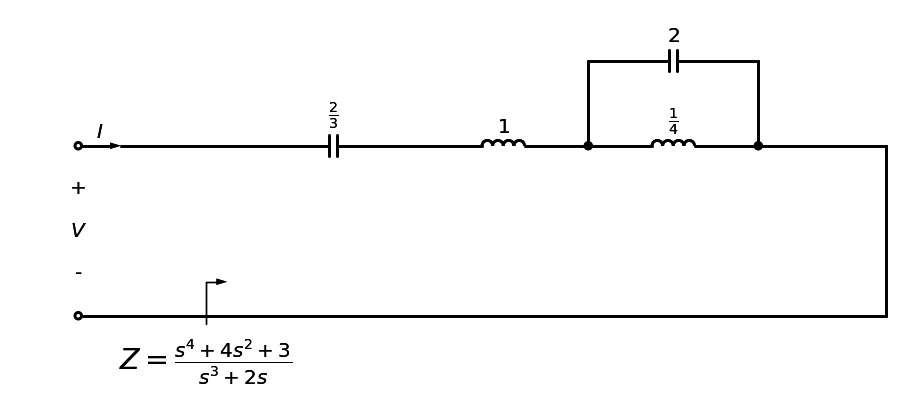

In [3]:
# ------------- Ejercicio 1 -------------- #

print('Se tiene la siguiente función de excitación, correspondiente a una Impedancia')

Z = ((s**2 + 3)*(s**2 + 1))/(s*(s**2 + 2))
Y = 1/Z

## --- Foster Serie --- ##

str_aux = a_equal_b_latex_s('Z(S)', Z)

Z = (s**4 + 4*s**2 + 3)/(s**3 + 2*s)
print_latex(a_equal_b_latex_s(str_aux[1:-1], Z))

print('Si se expande la función según Foster, Z(S) puede expresarse como')

k0, koo, ki_wi , _, Z_foster = foster(Z);

print_latex(a_equal_b_latex_s('Z(S)', Z_foster))

print("Con lo cual el circuito Foster serie resulta")
dibujar_foster_serie(k0, koo, ki_wi, z_exc=Z)

## -------------------- ##

Ahora se trabaja con la admitancia


<IPython.core.display.Math object>

La cual expandida por Foster se corresponde con


<IPython.core.display.Math object>

Con lo cual el circuito Foster paralelo resulta


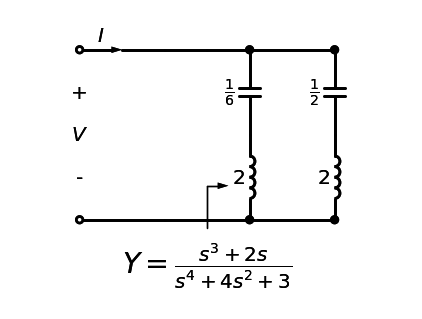

In [4]:
## --- Foster Paralelo --- ##

print("Ahora se trabaja con la admitancia")

str_aux = a_equal_b_latex_s('Y(S)', Y)
Y = 1/Z
print_latex(a_equal_b_latex_s(str_aux[1:-1], Y))

print("La cual expandida por Foster se corresponde con")

k0, koo, ki_wi , _, Y_foster = foster(Y);

print_latex(a_equal_b_latex_s('Y(S)', Y_foster))

print("Con lo cual el circuito Foster paralelo resulta")
dibujar_foster_derivacion(k0, koo, ki_wi, y_exc=Y)

## ----------------------- ##

Se realizan remociones de los residuos en infinito


<IPython.core.display.Math object>

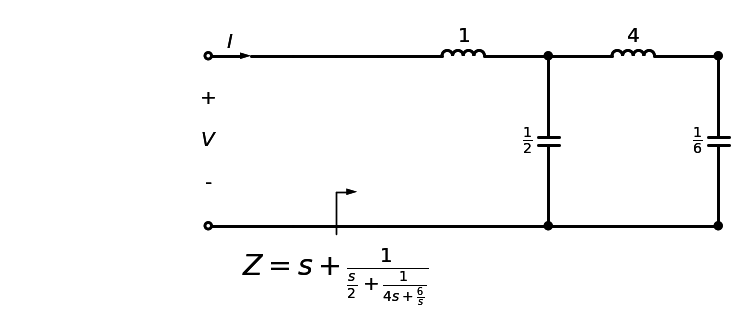

In [5]:
## --- Cauer I --- ##

print("Se realizan remociones de los residuos en infinito")

koo, Z_cauer_oo, rem = cauer_LC(Z, remover_en_inf=True)
print_latex(a_equal_b_latex_s(a_equal_b_latex_s('Z(S)', Z)[1:-1], Z_cauer_oo))
dibujar_cauer_LC(koo, z_exc=Z_cauer_oo)

## --------------- ##

Se realizan remociones de los residuos en cero


<IPython.core.display.Math object>

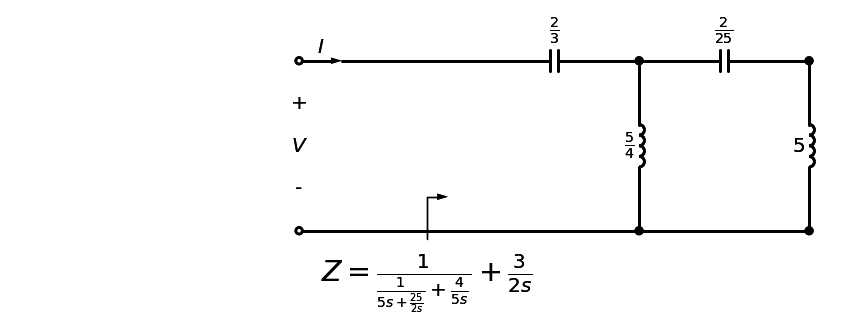

In [6]:
## --- Cauer II --- ##

print("Se realizan remociones de los residuos en cero")

k0, Z_cauer_oo, rem = cauer_LC(Z, remover_en_inf=False)
print_latex(a_equal_b_latex_s(a_equal_b_latex_s('Z(S)', Z)[1:-1], Z_cauer_oo))
dibujar_cauer_LC(k0, z_exc=Z_cauer_oo)

## ---------------- ##

Se observa que los resultados obtenidos a través de la simulación en Python se corresponden con lo desarrollado de manera analítica.


## Ejercicio 2

Sea
\begin{equation}
    Y(s) = \frac{3s(s^2+7/3)} { (s^2+2) (s^2+5) }
\end{equation}

Obtenga los valores de los componentes de la siguiente red sabiendo que L2 y C2 resuenan a 1 r/s.

<figure>
<center>
<img src="punto2.png">
<figcaption> Fig 1: Red circuital ejercicio 2.</figcaption>
</figure>


### Resolución analítica

En el PDF a continuación, se desarrolla lo solicitado en la consigna.

In [11]:
from IPython.display import IFrame
IFrame("./TS9_ej2.pdf", width = 900, height = 900)


### Resolución en Python

A continuación se desarrolla el ejercicio 2 utilizando métodos de simulación simbólica.

In [8]:
# ------ Funciones para dibujar Ej2 ------ #

from pytc2.dibujar import (dibujar_puerto_entrada, dibujar_funcion_exc_abajo, dibujar_espacio_derivacion,
                           dibujar_tanque_derivacion, dibujar_elemento_serie )

from schemdraw import Drawing
from schemdraw.elements import  Capacitor

from IPython.display import display


def dibujar_ej2(k0_w0=None, ki=None, y_exc=None):
    
## Fuente: Libreria pytc2
    
    d = Drawing(unit=4)
    
    bComponenteDibujado = False

    
    d = dibujar_puerto_entrada(d,
                                   voltage_lbl = ('+', '$V$', '-'), 
                                   current_lbl = '$I$')
    
    d, _ = dibujar_funcion_exc_abajo(d, 
                                              'Y',  
                                              y_exc, 
                                              hacia_salida = True,
                                              k_gap_width = 0.5)

    if not(k0_w0 is None):
    
        d = dibujar_elemento_serie(d, Capacitor, 1/k0_w0)


    if not(ki is None):

        for un_tanque in ki:

            if bComponenteDibujado:
                
                dibujar_espacio_derivacion(d)
             
            d = dibujar_tanque_derivacion(d, inductor_lbl = un_tanque[1], capacitor_lbl = 1/un_tanque[0])
            bComponenteDibujado = True

    display(d)

# --------------------------------------- #

Se tiene una función de admitancia dada por


<IPython.core.display.Math object>

Para poder fijar un cero en 1rad/s es necesario realizar una remoción parcial del polo en cero de la impendacia Z = 1/Y
Resulta entonces que


<IPython.core.display.Math object>

Con la impedancia que resulta de realizar la remoción, se realiza un foster derivación para llegar al circuito dado en la consigna


<IPython.core.display.Math object>

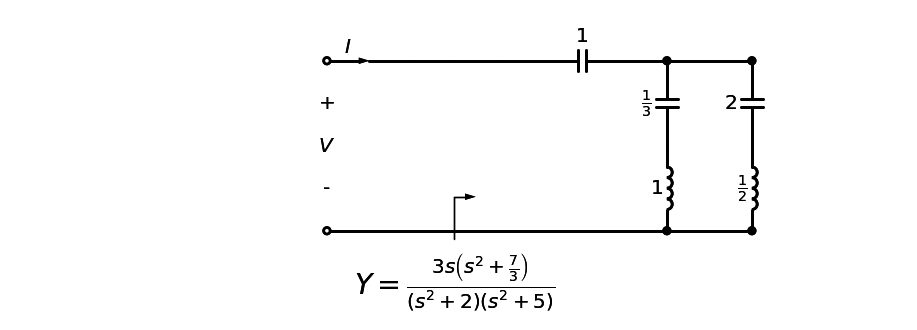

In [9]:
# ------------- Ejercicio 2 -------------- #

omega_resonancia = 1

Y = sp.nsimplify((3*s*(s**2 + 7/3))/((s**2 + 2)*(s**2 + 5)))
Z = 1/Y

print("Se tiene una función de admitancia dada por")
print_latex(a_equal_b_latex_s("Y(S)", Y))

print(f"Para poder fijar un cero en {omega_resonancia}rad/s " +
      "es necesario realizar una remoción parcial del polo en cero de la impendacia Z = 1/Y")

Z_w0, k0_w0 = remover_polo_dc(Z, omega_zero=omega_resonancia)

print("Resulta entonces que")
print_latex(a_equal_b_latex_s(a_equal_b_latex_s("Z(S)",Z)[1:-1], Z_w0+k0_w0))
k0_w0 *= s ## Por como lo devuelve la funcion remover_polo_dc (solo me interesa el coeficiente)

print("Con la impedancia que resulta de realizar la remoción, se realiza un foster derivación para llegar al circuito dado en la consigna")

k0, koo, ki_wi, _, Y_foster = foster(1/Z_w0)
print_latex(a_equal_b_latex_s('Y_2(S)',Y_foster ))

dibujar_ej2(k0_w0, ki_wi, Y)

# ---------------------------------------- #

Para este caso, también ser observa que los resultados de la simulación son iguales a los de la resolución analítica.